In [2]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [3]:
from keras.models import Sequential
from keras.layers import Convolution2D as Conv2D
from keras.layers import Flatten, MaxPooling2D
from keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
from keras.layers import Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np


In [4]:
batch_size = 1
img_size = (150, 150)
img_path = '/content/drive/MyDrive/DỮ LIỆU AI PHẦN BT CNN/FACE_RECOGNITION/train'

In [5]:
image_generator = ImageDataGenerator(
    rescale = 1./255,
    brightness_range = (0.8, 1.2),
    zoom_range= (0.9, 1.2),
    validation_split= 0.2)

train_dataset= image_generator.flow_from_directory(img_path,
                                      target_size = img_size,
                                      batch_size = batch_size,
                                      shuffle = True,
                                      class_mode = 'categorical',
                                      subset = 'training')
validation_dataset = image_generator.flow_from_directory(img_path,
                                      target_size = img_size,
                                      batch_size = batch_size,  
                                      shuffle = True,
                                      class_mode = 'categorical',
                                      subset = 'validation')

Found 46 images belonging to 2 classes.
Found 11 images belonging to 2 classes.


In [6]:
train_dataset.classes
print(train_dataset.class_indices)

{'Hien': 0, 'tri': 1}


In [7]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(512, kernel_size = (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 74, 74, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                        

In [8]:
opt = SGD(learning_rate = 0.001, momentum = 0.9)
model.compile(optimizer = opt, loss ='binary_crossentropy', metrics = ['accuracy'])

In [9]:
history = model.fit(train_dataset,batch_size=65,epochs=20,validation_data=validation_dataset)

Epoch 1/20
46/46 [==============================] - 33s 448ms/step - loss: 0.2403 - accuracy: 0.8913 - val_loss: 0.7470 - val_accuracy: 0.4545
Epoch 2/20
46/46 [==============================] - 5s 105ms/step - loss: 0.0260 - accuracy: 1.0000 - val_loss: 0.8255 - val_accuracy: 0.4545
Epoch 3/20
46/46 [==============================] - 5s 107ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.8105 - val_accuracy: 0.4545
Epoch 4/20
46/46 [==============================] - 5s 107ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 1.0301 - val_accuracy: 0.4545
Epoch 5/20
46/46 [==============================] - 5s 105ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.9419 - val_accuracy: 0.4545
Epoch 6/20
46/46 [==============================] - 5s 106ms/step - loss: 6.7956e-04 - accuracy: 1.0000 - val_loss: 0.7130 - val_accuracy: 0.3636
Epoch 7/20
46/46 [==============================] - 5s 105ms/step - loss: 3.7993e-04 - accuracy: 1.0000 - val_loss: 0.5583 - val_accuracy: 0.63

 ẢNH CỦA HIỂN 


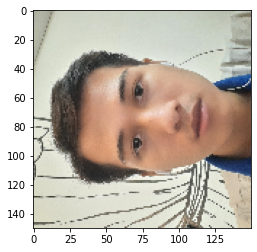

In [11]:
filename = "/content/drive/MyDrive/DỮ LIỆU AI PHẦN BT CNN/FACE_RECOGNITION/TEST/Hiển(1).jpg"

img = load_img(filename,target_size= img_size)
plt.imshow(img)
plt.show

img = img_to_array(img)
img  = img.reshape(1,*img_size,3)
img = img.astype('float32')
img = img/255
test = np.argmax(model.predict(img),axis =1)
if(test ==0):
    print(" ẢNH CỦA HIỂN ")
if(test==1):
    print("ẢNH CỦA TRÍ ")

ẢNH CỦA TRÍ 


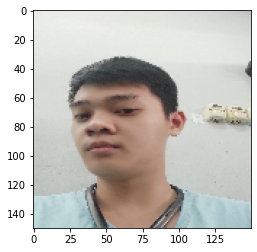

In [13]:
filename = "/content/drive/MyDrive/DỮ LIỆU AI PHẦN BT CNN/FACE_RECOGNITION/TEST/TRÍ.jpg"

img = load_img(filename,target_size= img_size)
plt.imshow(img)
plt.show

img = img_to_array(img)
img  = img.reshape(1,*img_size,3)
img = img.astype('float32')
img = img/255
test = np.argmax(model.predict(img),axis =1)
if(test ==0):
    print(" ẢNH CỦA HIỂN ")
if(test==1):
        print("ẢNH CỦA TRÍ ")


 ẢNH CỦA HIỂN 


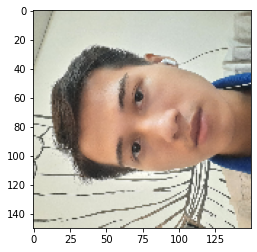

In [14]:
filename = "/content/drive/MyDrive/DỮ LIỆU AI PHẦN BT CNN/FACE_RECOGNITION/TEST/Hiển.jpg"

img = load_img(filename,target_size= img_size)
plt.imshow(img)
plt.show

img = img_to_array(img)
img  = img.reshape(1,*img_size,3)
img = img.astype('float32')
img = img/255
test = np.argmax(model.predict(img),axis =1)
if(test ==0):
    print(" ẢNH CỦA HIỂN ")
if(test==1):
        print("ẢNH CỦA TRÍ ")